#Import Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
sns.set()

#Load CSV file

In [ ]:
raw_data = pd.read_csv('/1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


#Idea is to predict the price of a used car, We can consider data like brand (good brand more price), mileage (more car is driven less the price), engine volume (large volume more price), year (older the car less the price)

#Data Preprocessing

###We must first find and identify abnormalities so open description of the data

In [ ]:
raw_data.describe(include='all') #include all shows complete description including categorical variables

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


###Here look at count row, count of all columns are different means there are missing values in the dataset

###In model we observe 312 unique values, we cant perform linear regression on this as that would require 312 dummies

###The row 'top' indicates the most frequent entries, and 'freq' indicates the frequency of the top entry.
###So, we can see that in Registration column there are 3947 yes entries out of 4345 data nearly most of it is yes so registration wont be a good feature for the model

In [ ]:
#We will drop the model column as it has so many unique values we wont use it in our model
data = raw_data.drop(['Model'], axis = 1) #axis 0 means rows and axis 1 means columns here we drop the model column
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


###Check for missing values

In [ ]:
data.isnull() #true if there is missing value false if there is not
#since true is 1 and false is 0 we can use .sum() method to add the number of true values(null values)
data.isnull().sum()

,0
Brand,0
Price,172
Body,0
Mileage,0
EngineV,150
Engine Type,0
Registration,0
Year,0


###We can see Price has 172 null values and Engine volume has 150 null values

In [ ]:
#drop observations with null values
data_no_mv = data.dropna(axis=0) #here axis 0 means im dropping the entire row where we have a null value
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


###Analysing Probability Distribution Function

/tmp/ipython-input-39-216991009.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Price'])


<Axes: xlabel='Price', ylabel='Density'>

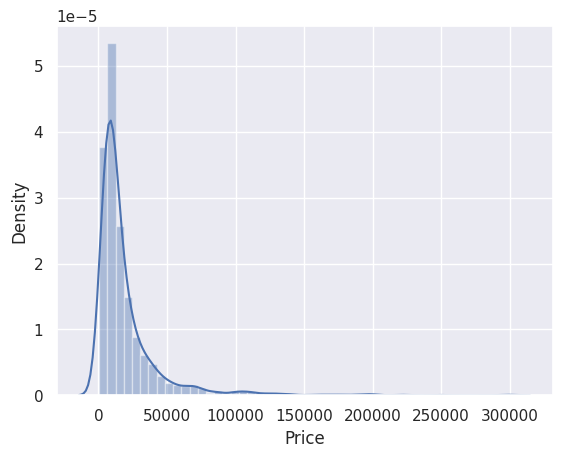

In [ ]:
sns.distplot(data_no_mv['Price'])

###Here if we check mean of price and price at min to 25 to 50 to 75 to max we see huge difference in price also if we see the graph we see some values further away from others these values are called outliers, one way to remove these outliers is by removing top 1% of the observations we can do this in code using quantile (quantile is a statistical value that divides the data into equal sized intervals example for quantiles are 1. median(2 parts 50%each) 2. quartile(4 parts 25%each) 3. deciles(10 parts 10%each) 4. percentiles(100 parts 1%each).

In [ ]:
#removing outliers
#outliers are either the extreme top or extreme bottom data so in this problem the data is at extreme top so we can remove the top 1% of data
q = data_no_mv['Price'].quantile(0.99) #for 25th percentile we do 0.25 quantile, for 99th percentile we do 0.99 quantile
#we want to keep the data below 99th percentile
data_1 = data_no_mv[data_no_mv['Price']<q] #data_1 has all data that comes below the 99th percentile removing the outliers
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


###So now the max value is nearly 130000 which is the 99th percentile thus we our outliers are removed although its still very higher than the mean its still acceptably lower

/tmp/ipython-input-41-2980401230.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Price']) #we can see outliers are reduced


<Axes: xlabel='Price', ylabel='Density'>

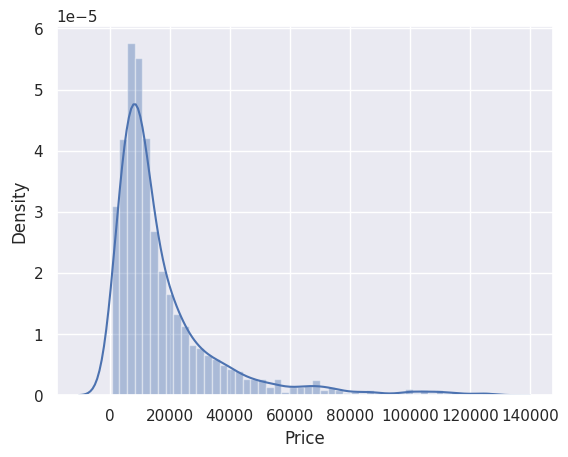

In [ ]:
sns.distplot(data_1['Price']) #we can see outliers are reduced

###Similarly for mileage now

/tmp/ipython-input-42-534165355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

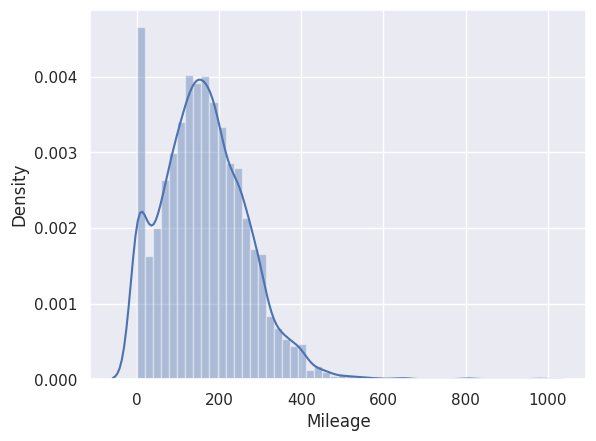

In [ ]:
sns.distplot(data_no_mv['Mileage'])

In [ ]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_no_mv['Mileage']<q]
data_2.describe(include='all')

/tmp/ipython-input-43-2867969918.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_2 = data_1[data_no_mv['Mileage']<q]


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


/tmp/ipython-input-44-1950307955.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

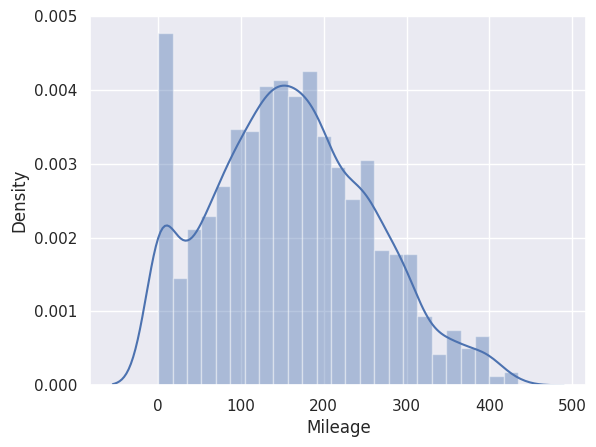

In [ ]:
sns.distplot(data_2['Mileage'])

### Similarly now for engine volume

/tmp/ipython-input-45-823394628.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

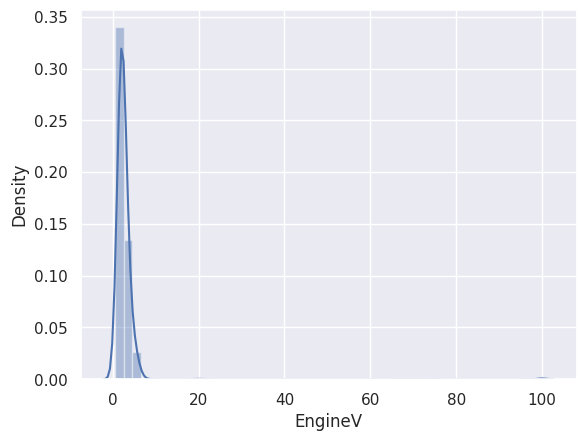

In [ ]:
sns.distplot(data_no_mv['EngineV'])

if we see description we can find there are some engine volume values of 99.99 which are not actual values but false values so we must remove them as 99.99 are outliers in graph on quick wikipedia search we know that engine volumes must fall in between 0.6 and 6.5 so now remove all values above 6.5

/tmp/ipython-input-46-3404246461.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

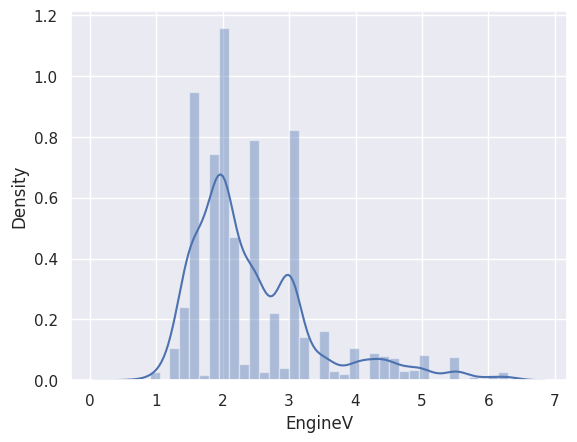

In [ ]:
data_3 = data_2[data_2['EngineV']<6.5]
sns.distplot(data_3['EngineV'])

###Similarly in year

###in year the outliers are at the bottom most so we must take the first 1% and remove it

/tmp/ipython-input-47-3029883836.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4['Year'])


<Axes: xlabel='Year', ylabel='Density'>

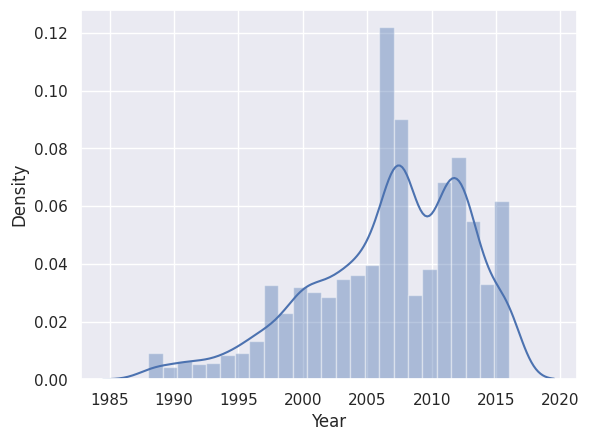

In [ ]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]
sns.distplot(data_4['Year'])

In [ ]:
data_cleaned = data_4.reset_index(drop=True) #index value in data_4 is reassigned and drop true means old index values are deleted and all this clean data with correct index values are stored in data_clean

In [ ]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


***********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

#Checking OLS Assumptions

##1. Linearity

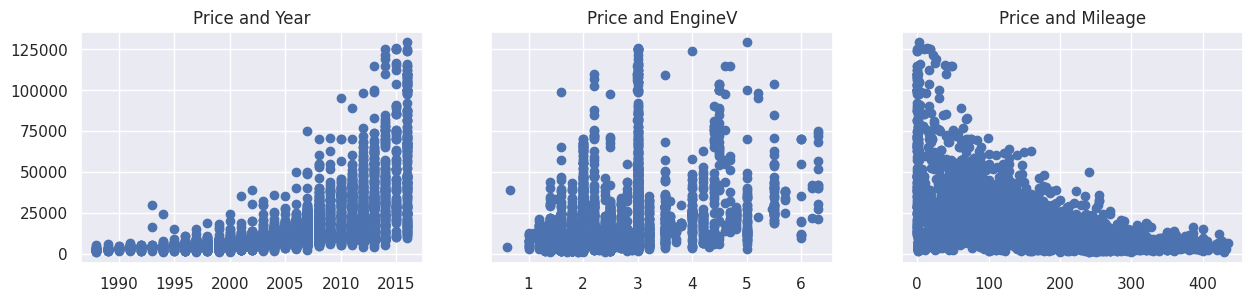

In [ ]:
#lets check for linearity using scatter plot
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

###We can spot u shape curves but not linear lines so we must transform the data, log transformations are specially useful in cases of exponential relationships

In [ ]:
log_price = np.log(data_cleaned['Price']) #log values of all data in price column is stored in log_price
data_cleaned['log_price'] = log_price #new column log_price is added to data_cleaned
data_cleaned


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


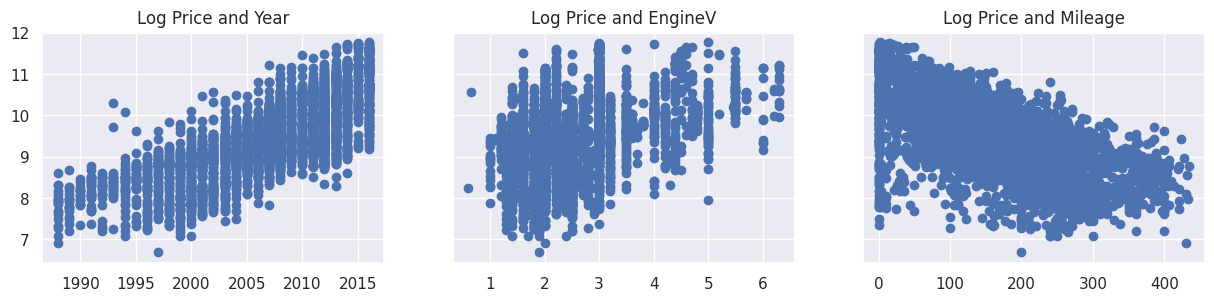

In [ ]:
#lets plot now with log price
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')
plt.show()

###now we can see linearity or linear pattern

In [ ]:
data_cleaned = data_cleaned.drop(['Price'],axis=1) #dropping original price as its no longer needed

###2. No endogeneity - its not violated we can assume this true
###3. Normality and homoscadasticity - big sample assumes normality, zero mean is assumed by including intercept in equation, we already implemented log transformation so homoscadasticity is also assumed.
###4. No Autocorrelation - observations are not from panel or time series data so observations cant be dependant on each other so no autocorellation is assumed
###5. multicollinearity - logically year and mileage can be corelated more old years of car will have more mileage. sklearn doesnt have method to check this we must use statsmodel we can take Variance inflation factor(VIF), VIF produces a measure which estimates how much larger the square root of std error of an estimate is compared to situation where variable is completely uncorelated with other predictors

In [ ]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']] #here we have only these 3 continuous variables remaining are categorical
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


###vif of 1 to 5 means no multicollinearity, above 10 is not acceptable 6 to 10 is ok sometimes but in our case we can see that year has vif above 10 so just drop year

In [ ]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

#Create Dummy Variables

pandas method get dummies spots all categorical variables and creates dummies automatically, if we have n categories for a feature we must create n-1 dummies(its simple logic watch advanced stats, linear regression practice 3rd video to know why)

In [ ]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True) #dropfirst true means dummy of first category must be dropped thus we get n-1 dummies

In [ ]:
data_with_dummies

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
3863,35,1.6,9.792556,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
3864,9,3.0,11.736069,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
3865,1,3.5,8.779557,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True


In [ ]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [ ]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'] #we just put log price as first column

In [ ]:
data_preprocessed = data_with_dummies [cols]
data_preprocessed

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.350102,163,2.5,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
3863,9.792556,35,1.6,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
3864,11.736069,9,3.0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
3865,8.779557,1,3.5,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True


#Now we do Linear Regression

In [ ]:
#declare inputs and targets
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

In [ ]:
#scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs) #all inputs are standardized, its usually not recommended to standardize dummy variables but still scaling has no effect on predicting power of the dummies but once scaled they loose all their dummy meaning.


In [ ]:
#split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [ ]:
#create regression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

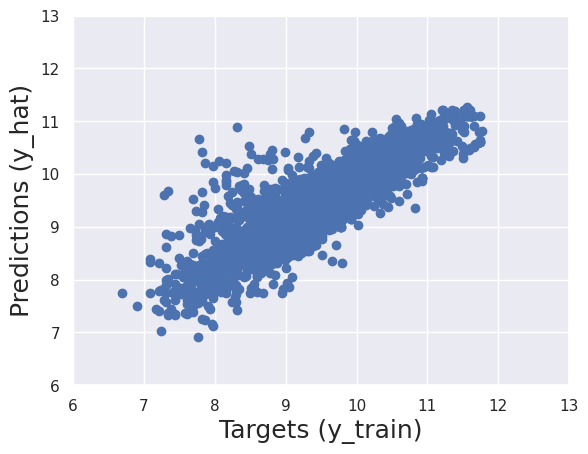

In [ ]:
#simple way to check final result is to plot predicted values against observed values
y_hat = reg.predict(x_train)
plt.scatter(y_train,y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

###in above graph if we consider best case scenario we expect a 45 degree line where is prediction is 7 then target also is 7 if its 10 then target also is 10 and so on, our model is slightly close to that.
###Next we will check the residual plot, residual is the difference between the prediction and the targets

/tmp/ipython-input-75-1217150369.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat) #difference between y_train and y_hat gives residual


Text(0.5, 1.0, 'Residuals PDF')

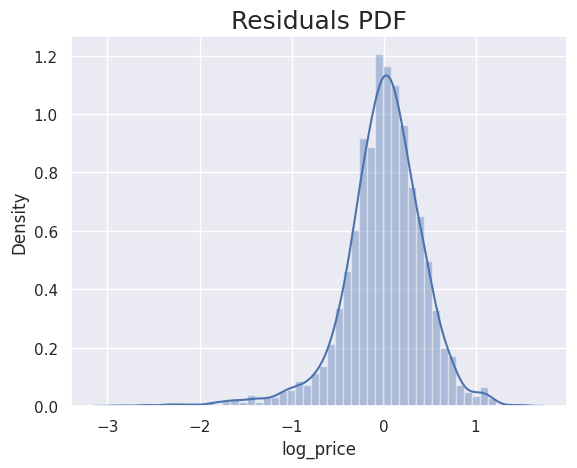

In [ ]:
sns.distplot(y_train - y_hat) #difference between y_train and y_hat gives residual
plt.title("Residuals PDF", size =18)

###in ols assumptions normality criteria we know that the errors must be normally distributed with mean of 0 since residuals are estimates of errors they too follow the same pattern which can be seen in the above graph.
###We can see much longer tail on -ve side it means more predictions are overestimated from actual target values but less predictions are underestimated from targets as the tail is short on +ve side this gives us a valuable insight

In [ ]:
#find r square
reg.score(x_train,y_train)

0.744996578792662

###Our model thus explains 75% of the variability of data
###Finding weights and bias

In [ ]:
reg.intercept_

np.float64(9.415239458021299)

In [ ]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [ ]:
#creating summary table
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


###A positive weight shows that as a feature increases  in value, so does the log price and then the price respectively alternatively a negative value of weight shows that as a feature increases in value the log price decreases and then the price decreases respectively

### the dropped dummy actually is the bench mark when all other dummies are zero the dropped dummy is 1, a positive weight on dummy shows price of that category is more than the bench mark in our example audi is the bench mark

In [ ]:
data_cleaned['Brand'].unique() #we can see audi was dropped so it became the benchmark

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

### So dummies are compared seperately with benchmark dummy and continuos variables are seperately compared among themselves

#Testing

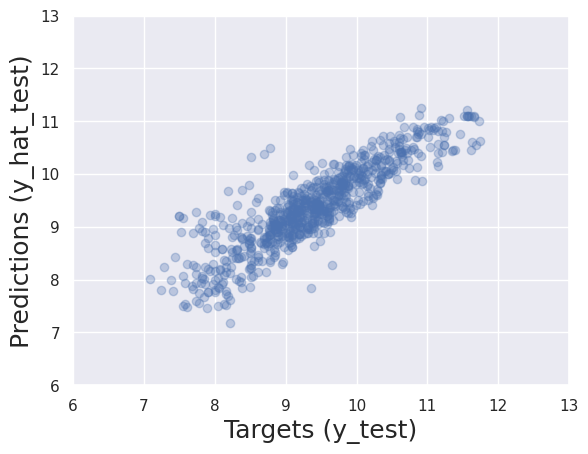

In [ ]:
y_hat_test = reg.predict(x_test)
plt.scatter(y_test,y_hat_test,alpha = 0.3)#alpha gives opacity less concentration less opaque
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

###we can see the data points are close to 45 degree line at higher prices but at lower prices its far this means are model is efficiently predicting in higher prices

In [ ]:
#to check performance of our model
df_pf = pd.DataFrame(np.exp(y_hat_test),columns=['Predictions']) #we used np.exp to convert log prices to prices
df_pf.head()


,Predictions
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [ ]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN
...,...,...
769,29651.726363,6950.0
770,10732.071179,NaN
771,13922.446953,NaN
772,27487.751303,NaN


###shows lot of missing values lets check y_test

In [ ]:
y_test

,log_price
1192,7.740664
3360,7.937375
2350,7.824046
3257,8.764053
892,9.121509
...,...
1935,10.292146
3757,9.169518
3134,9.814656
1369,11.134589


###so when we tried to add y_test to df_pf Pandas tried to match the indices but during test train split the old indices remained so now we must reset index of y_test

In [ ]:
y_test = y_test.reset_index(drop=True)
y_test

,log_price
0,7.740664
1,7.937375
2,7.824046
3,8.764053
4,9.121509
...,...
769,10.292146
770,9.169518
771,9.814656
772,11.134589


In [ ]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
...,...,...
769,29651.726363,29500.0
770,10732.071179,9600.0
771,13922.446953,18300.0
772,27487.751303,68500.0


In [ ]:
#compare predictions with target
df_pf['Residual'] = df_pf['Predictions'] - df_pf['Target']
df_pf['Difference_in_%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Predictions,Target,Residual,Difference_in_%
0,10685.501696,2300.0,8385.501696,364.587030
1,3499.255242,2800.0,699.255242,24.973402
2,7553.285218,2500.0,5053.285218,202.131409
3,7463.963017,6400.0,1063.963017,16.624422
4,11353.490075,9150.0,2203.490075,24.081859
...,...,...,...,...
769,29651.726363,29500.0,151.726363,0.514327
770,10732.071179,9600.0,1132.071179,11.792408
771,13922.446953,18300.0,-4377.553047,23.921055
772,27487.751303,68500.0,-41012.248697,59.871896


In [ ]:
df_pf.describe()

,Predictions,Target,Residual,Difference_in_%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,-2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-85106.162329,0.062794
25%,7413.644234,6900.000000,-3147.343497,12.108022
50%,11568.168859,11600.000000,-142.518577,23.467728
75%,20162.408805,20500.000000,2044.191251,39.563570
max,77403.055224,126000.000000,29456.498331,512.688080


###min diff in percentages is 0.06 so output was very spot on although max is very off mark in other percentiles like 25, 50 or 75 we can see that we got relatively close

In [ ]:
#sorting the difference in percentage values

pd.options.display.max_rows = 999 #this displays all 999 rows in dataset as by default we cant see all here
pd.set_option('display.float_format',lambda x: '%.2f' % x) #this rounds off all float values to 2 digits
df_pf.sort_values(by=['Difference_in_%'])

,Predictions,Target,Residual,Difference_in_%
698,30480.85,30500.00,-19.15,0.06
742,16960.31,16999.00,-38.69,0.23
60,12469.21,12500.00,-30.79,0.25
110,25614.14,25500.00,114.14,0.45
367,42703.68,42500.00,203.68,0.48
369,3084.69,3100.00,-15.31,0.49
769,29651.73,29500.00,151.73,0.51
272,9749.53,9800.00,-50.47,0.52
714,23118.07,22999.00,119.07,0.52
630,8734.58,8800.00,-65.42,0.74


###if we see the last few predictions are very far off from observed values as our model uses mileage engine vol, brand, registration and body type to predict the price it works well overall but not for these last few samples also all the residuals for these specific outliers is negative means predictions are higher than targets, an explaination to this can be missing a important factor that drives the price of a used car lower, it may be the model of the car which we didnt consider from starting or it can be possible the car was damaged in some way.
###To improve our model we can use different set of variables, remove bigger part of the outliers or use different kind of transformations.